In [12]:
import numpy as np
import xarray as xr

def getclosest_ij(lats, lons, latpt, lonpt):
    """Function to find the index of the closest point to a certain lon/lat value."""
    dist_sq = (lats - latpt) ** 2 + (lons - lonpt) ** 2  # find squared distance of every point on grid
    minindex_flattened = np.nanargmin(dist_sq)  # 1D index of minimum dist_sq element
    return np.unravel_index(minindex_flattened,
                            lats.shape)  # Get 2D index for latvals and lonvals arrays from 1D index

In [6]:
file = '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-09.nc'

In [9]:
df = xr.open_dataset(file)

In [15]:
df

<xarray.Dataset>
Dimensions:       (y: 3059, x: 4322, deptht: 50)
Coordinates:
    nav_lon       (y, x) float32 72.96 73.04 73.12 73.21 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    time_counter  datetime64[ns] ...
  * deptht        (deptht) float64 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Data variables:
    sotkeavmu1    (y, x) float32 ...
    sotkeavmu15   (y, x) float32 ...
    sotkeavmu30   (y, x) float32 ...
    sotkeavmu50   (y, x) float32 ...
    vozocrtx      (deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    file_name:    ORCA12_LIM-T00_y2021m09d27_gridU.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-OCT-03 18:27:01 GMT-0000
    references:   http://www.mercator-ocean.eu

In [13]:
minlat = 25
maxlat = 50
minlon = -5
maxlon = 38


latvals = df['nav_lat'].values
lonvals = df['nav_lon'].values

iy_min, ix_min = getclosest_ij(latvals, lonvals, minlat, minlon)
iy_max, ix_max = getclosest_ij(latvals, lonvals, maxlat, maxlon)
iy_min -= 1
ix_min -= 1
iy_max += 1
ix_max += 1
indices = {'lat': range(iy_min, iy_max), 'lon': range(ix_min, ix_max)}

In [14]:
indices

{'lat': range(1803, 2306), 'lon': range(3383, 3872)}

In [35]:
subset = df.isel(x=slice(3350, 3950), y=slice(1850, 2200), deptht=slice(0,2))

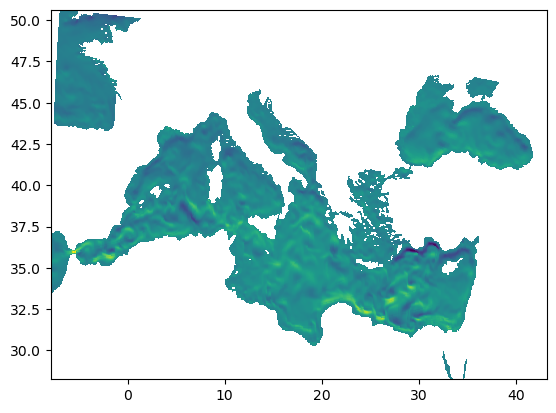

In [37]:
import matplotlib.pyplot as plt
plt.pcolormesh(subset['nav_lon'], subset['nav_lat'], subset['vozocrtx'][0])
plt.show()

In [40]:
# This looks decent. Save as netcdf
subset['vozocrtx']

<xarray.DataArray 'vozocrtx' (deptht: 2, y: 350, x: 600)>
[420000 values with dtype=float32]
Coordinates:
    nav_lon       (y, x) float32 -7.871 -7.788 -7.704 ... 42.94 43.02 43.1
    nav_lat       (y, x) float32 28.42 28.42 28.42 28.42 ... 45.71 45.7 45.69
  * x             (x) int32 3351 3352 3353 3354 3355 ... 3947 3948 3949 3950
  * y             (y) int32 1851 1852 1853 1854 1855 ... 2197 2198 2199 2200
    time_counter  datetime64[ns] ...
  * deptht        (deptht) float64 0.494 1.541
Attributes:
    units:               m s-1
    valid_min:           -10.0
    valid_max:           10.0
    long_name:           Zonal velocity
    standard_name:       sea_water_x_velocity
    short_name:          vozocrtx
    online_operation:    N/A
    interval_operation:  86400
    interval_write:      86400
    associate:           time_counter deptht nav_lat nav_lon

In [38]:
subset.to_netcdf('../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-09_mediterranean_subet.nc')

In [41]:
file = '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_V_2019-01-09.nc'
df = xr.open_dataset(file)
subset = df.isel(x=slice(3350, 3950), y=slice(1850, 2200), deptht=slice(0,2))
subset.to_netcdf('../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_V_2019-01-09_mediterranean_subet.nc')

In [43]:
file = '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2019-01-09.nc'
df = xr.open_dataset(file)
subset = df.isel(x=slice(3350, 3950), y=slice(1850, 2200), depthw=slice(0,2))
subset.to_netcdf('../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2019-01-09_mediterranean_subet.nc')

In [59]:
file = '../../data/input_data/MOi/domain_ORCA0083-N006/coordinates.nc'
df = xr.open_dataset(file, decode_cf=False)
subset = df.isel(x=slice(3350, 3950), y=slice(1850, 2200))
subset.to_netcdf('../../data/input_data/MOi/domain_ORCA0083-N006/coordinates_mediterranean_subset.nc')

In [ ]:
## compression in to_netcdf() for making files smaller
derivatives.to_netcdf(derivative_output_dir + f"psy4v3r1_velocity_derivatives_{str(derivatives.time_counter.values)[:10]}.nc",
!!!                    encoding={var: {"zlib": True, "complevel": 2} for var in ['dudx', 'dudy', 'dvdx', 'dvdy']}) #dtype
                    




In [60]:
subset

<xarray.Dataset>
Dimensions:     (y: 350, x: 600, time: 1)
Coordinates:
  * time        (time) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/20)
    nav_lon     (y, x) float32 ...
    nav_lat     (y, x) float32 ...
    nav_lev     float32 ...
    time_steps  (time) int32 ...
    glamt       (time, y, x) float64 ...
    glamu       (time, y, x) float64 ...
    ...          ...
    e1v         (time, y, x) float64 ...
    e1f         (time, y, x) float64 ...
    e2t         (time, y, x) float64 ...
    e2u         (time, y, x) float64 ...
    e2v         (time, y, x) float64 ...
    e2f         (time, y, x) float64 ...
Attributes:
    Conventions:               GDT 1.2
    file_name:                 coordinates_ORCA_R12.nc
    TimeStamp:                 2004-OCT-12 14:01:07 GMT+0200
    history:                   Fri Apr 16 17:40:50 2010: ncwa -a z coordinate...
    nco_openmp_thread_number:  1

In [63]:
from parcels import FieldSet

ocean_mesh = '../../data/input_data/MOi/domain_ORCA0083-N006/coordinates_mediterranean_subset.nc'

ufiles = ['../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-09_mediterranean_subet.nc']
vfiles = ['../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_V_2019-01-09_mediterranean_subet.nc']
wfiles = ['../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2019-01-09_mediterranean_subet.nc']




filenames = {'U': {'lon': ocean_mesh, 'lat': ocean_mesh, 'depth': wfiles[0], 'data': ufiles},
                'V': {'lon': ocean_mesh, 'lat': ocean_mesh, 'depth': wfiles[0], 'data': vfiles},
                'W': {'lon': ocean_mesh, 'lat': ocean_mesh, 'depth': wfiles[0], 'data': wfiles}}

#filenames = {'U': {'lon': ocean_mesh, 'lat': ocean_mesh, 'data': ufiles},
#                'V': {'lon': ocean_mesh, 'lat': ocean_mesh, 'data': vfiles},
#                'W': {'lon': ocean_mesh, 'lat': ocean_mesh, 'data': wfiles}}

variables = {'U': 'vozocrtx',
                'V': 'vomecrty',
                'W': 'vovecrtz'}

dimensions = {'U': {'lon': 'glamf', 'lat': 'gphif', 'depth': 'depthw', 'time': 'time_counter'}, #time_centered
                'V': {'lon': 'glamf', 'lat': 'gphif', 'depth': 'depthw', 'time': 'time_counter'},
                'W': {'lon': 'glamf', 'lat': 'gphif', 'depth': 'depthw', 'time': 'time_counter'}}

In [64]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions, allow_time_extrapolation=False)


In [75]:
fieldset.U.data.shape, fieldset.U.grid.lon.shape, fieldset.U.grid.lat.shape

((1, 2, 350, 600), (350, 600), (350, 600))

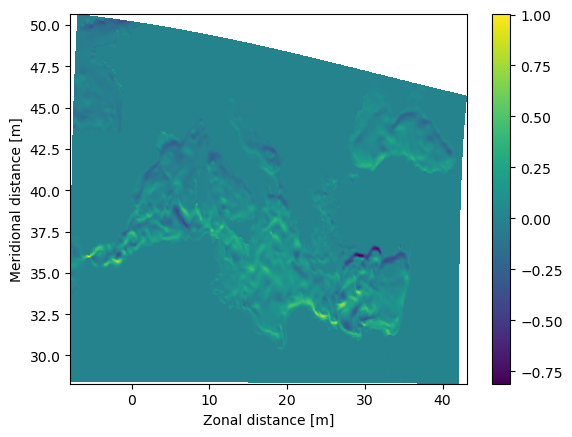

In [76]:
fieldset.computeTimeChunk(time=0, dt=2)

plt.pcolormesh(fieldset.U.grid.lon, fieldset.U.grid.lat, fieldset.U.data[0,0])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()
plt.show()

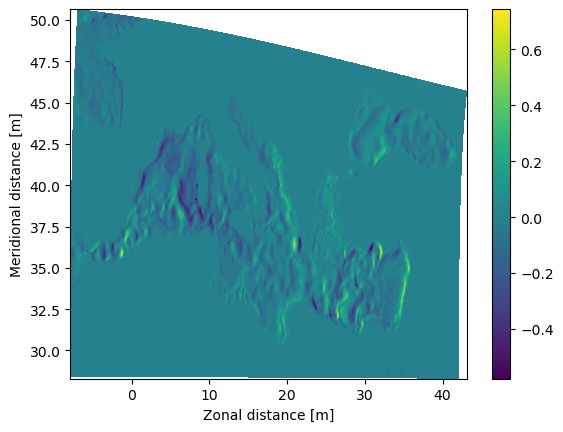

In [77]:
fieldset.computeTimeChunk(time=0, dt=2)

plt.pcolormesh(fieldset.V.grid.lon, fieldset.V.grid.lat, fieldset.V.data[0,0])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()
plt.show()

In [78]:

## Try zipping
import zipfile
with zipfile.ZipFile('../../data/input_data/MOi/psy4v3r1/Archive.zip', 'r') as zip_ref:
    zip_ref.extractall('../../data/input_data/MOi/psy4v3r1/test/')